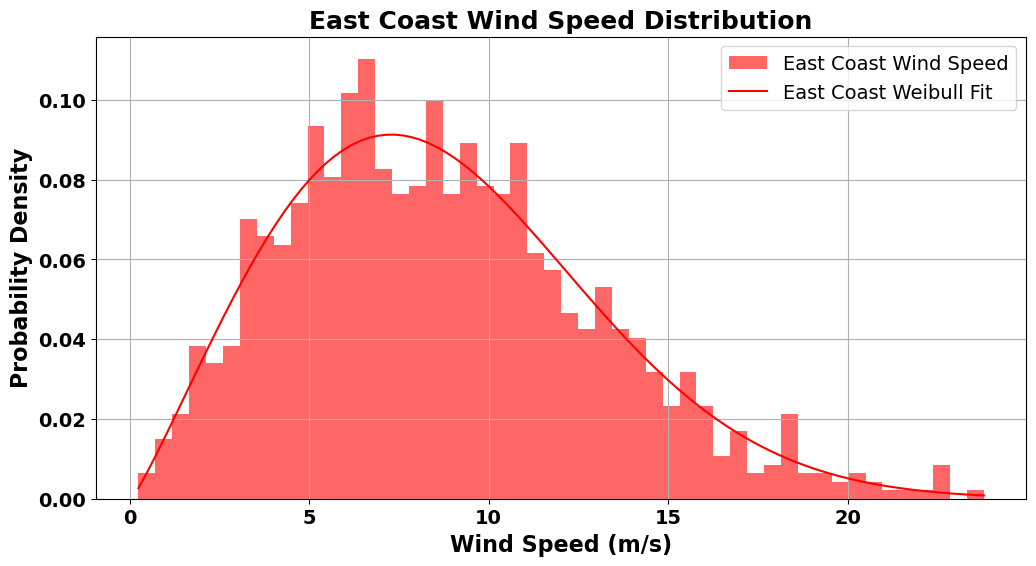

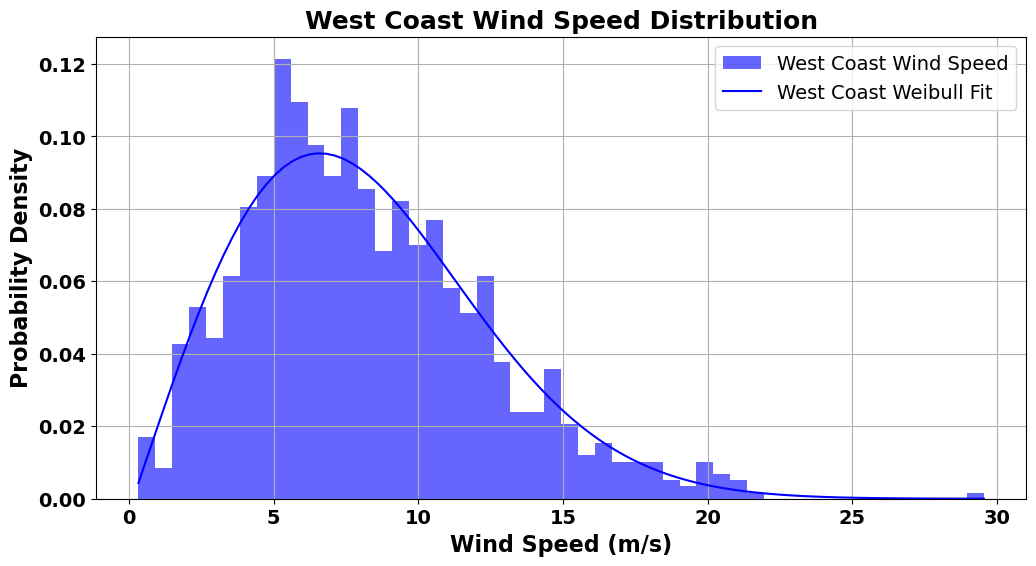

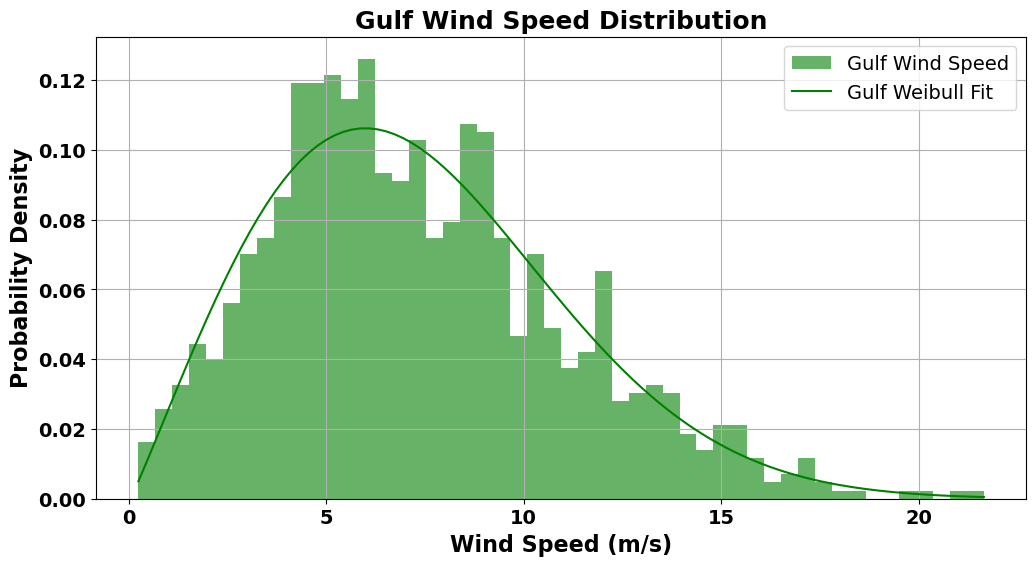

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Hardcoded Weibull parameters extracted from the Excel file
# East Coast parameters
scale_east_coast = 9.767475
shape_east_coast = 2.119781

# West Coast parameters
scale_west_coast = 9.494586
shape_west_coast = 2.127585

# Gulf parameters
scale_gulf = 8.379240
shape_gulf = 2.097745

# Generate the wind speed samples using the extracted parameters
east_coast_windspeed_sample = np.random.weibull(shape_east_coast, 1000) * scale_east_coast
west_coast_windspeed_sample = np.random.weibull(shape_west_coast, 1000) * scale_west_coast
gulf_windspeed_sample = np.random.weibull(shape_gulf, 1000) * scale_gulf

# Function to plot histogram and fitted distribution
def plot_windspeed_distribution(sample, label, color):
    plt.hist(sample, bins=50, density=True, alpha=0.6, color=color, label=f'{label} Wind Speed')
    shape, loc, scale = stats.weibull_min.fit(sample)
    x = np.linspace(sample.min(), sample.max(), 100)
    pdf_fitted = stats.weibull_min.pdf(x, shape, loc, scale)
    plt.plot(x, pdf_fitted, f'{color}-', label=f'{label} Weibull Fit')
    plt.title(f'{label} Wind Speed Distribution', fontweight='bold', fontsize=18)
    plt.xlabel('Wind Speed (m/s)', fontweight='bold', fontsize=16)
    plt.ylabel('Probability Density', fontweight='bold', fontsize=16)
    plt.legend(fontsize=14, loc='upper right')
    plt.grid(True)
    plt.xticks(fontweight='bold', fontsize=14)
    plt.yticks(fontweight='bold', fontsize=14)

# Plotting East Coast
plt.figure(figsize=(12, 6))
plot_windspeed_distribution(east_coast_windspeed_sample, 'East Coast', 'r')
plt.savefig('east_coast_windspeed_distribution.png')
plt.show()

# Plotting West Coast
plt.figure(figsize=(12, 6))
plot_windspeed_distribution(west_coast_windspeed_sample, 'West Coast', 'b')
plt.savefig('west_coast_windspeed_distribution.png')
plt.show()

# Plotting Gulf
plt.figure(figsize=(12, 6))
plot_windspeed_distribution(gulf_windspeed_sample, 'Gulf', 'g')
plt.savefig('gulf_windspeed_distribution.png')
plt.show()


/var/folders/dz/6yhdzf696ql63vnkrr6zdhs80000gn/T/ipykernel_8647/1863869484.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticks(), fontweight='bold', fontsize=14)
/var/folders/dz/6yhdzf696ql63vnkrr6zdhs80000gn/T/ipykernel_8647/1863869484.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(axs[0].get_yticks(), fontweight='bold', fontsize=14)
/var/folders/dz/6yhdzf696ql63vnkrr6zdhs80000gn/T/ipykernel_8647/1863869484.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticks(), fontweight='bold', fontsize=14)
/var/folders/dz/6yhdzf696ql63vnkrr6zdhs80000gn/T/ipykernel_8647/1863869484.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(axs[1].get_yticks(), fontweight='bold', fontsize=14)
/var/folders/dz/6yhdzf696ql63vnkrr6zdhs80000gn/T/ipykernel_8

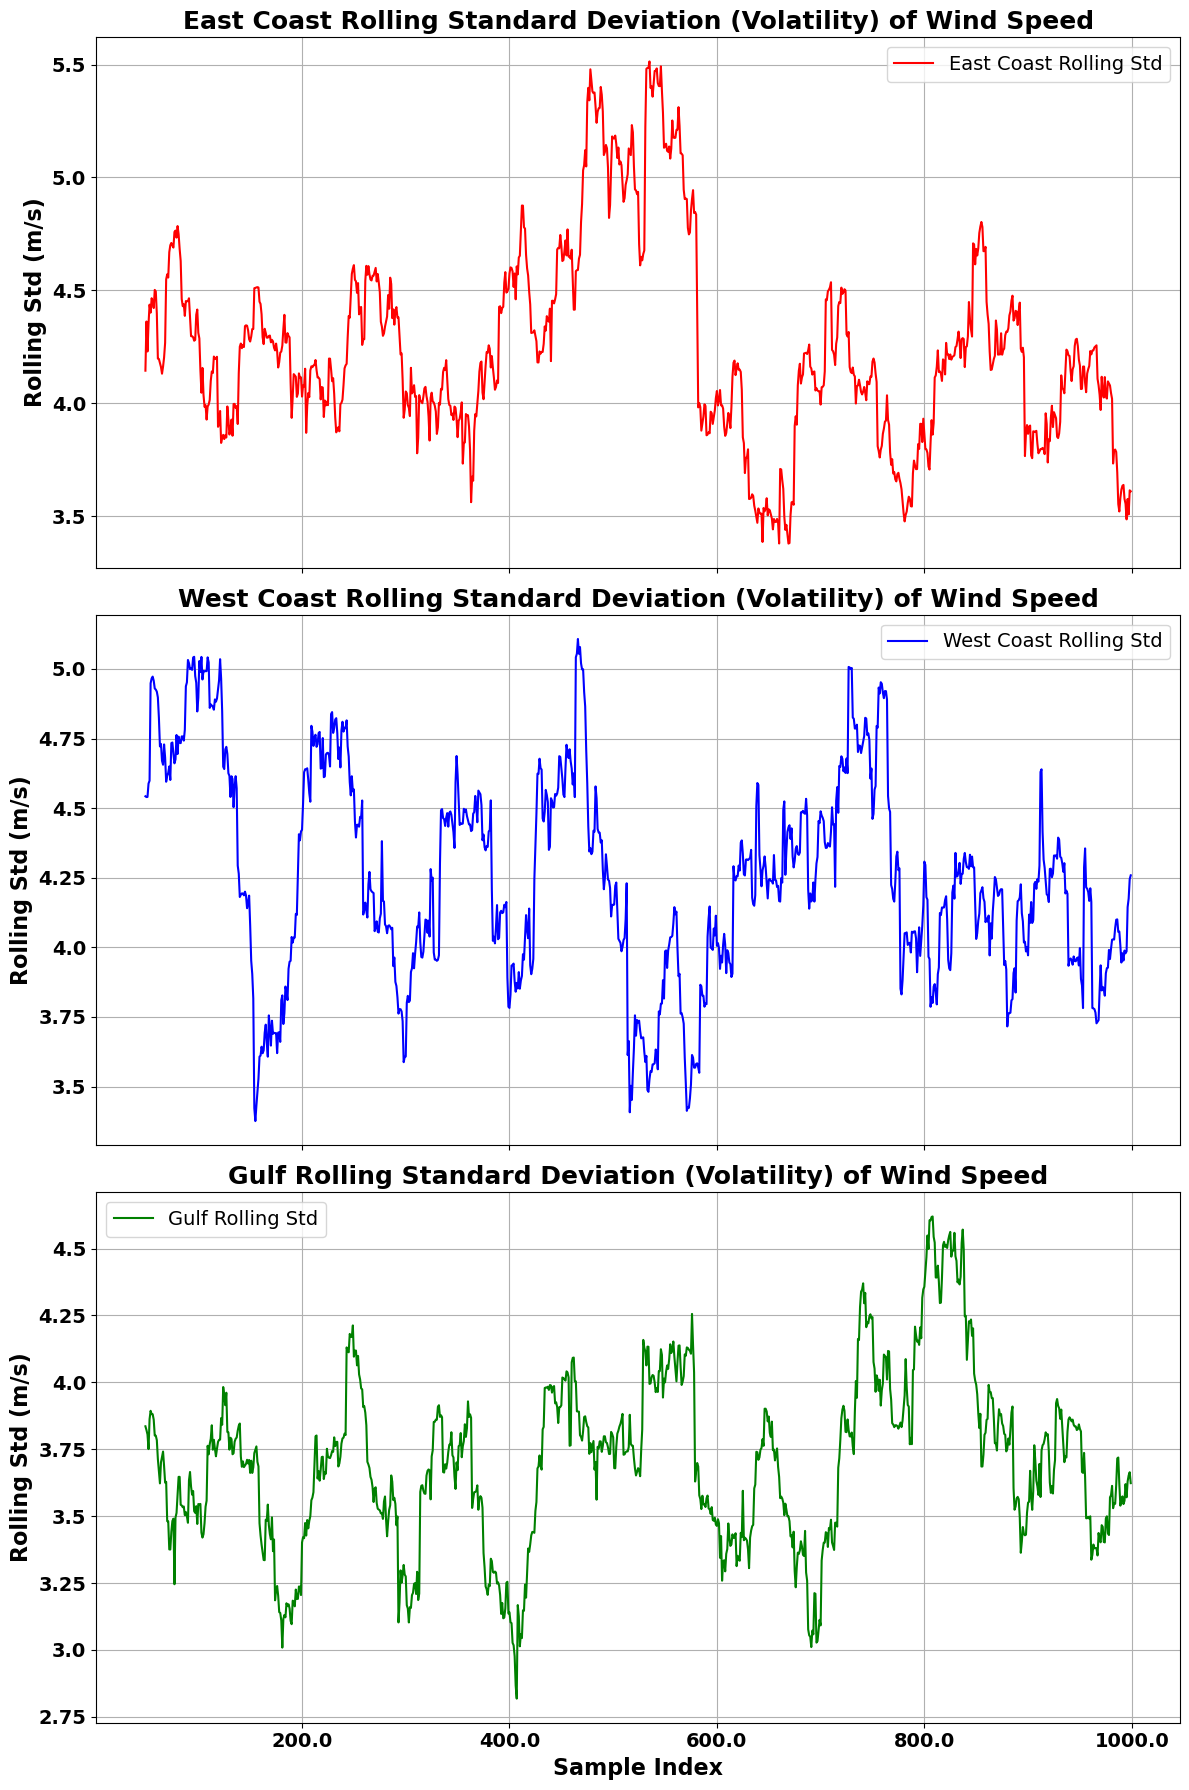

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Hardcoded Weibull parameters extracted from the Excel file
# East Coast parameters
scale_east_coast = 9.767475
shape_east_coast = 2.119781

# West Coast parameters
scale_west_coast = 9.494586
shape_west_coast = 2.127585

# Gulf parameters
scale_gulf = 8.379240
shape_gulf = 2.097745

# Generate the wind speed samples using the actual parameters
np.random.seed(42)
east_coast_windspeed_sample = np.random.weibull(shape_east_coast, 1000) * scale_east_coast
west_coast_windspeed_sample = np.random.weibull(shape_west_coast, 1000) * scale_west_coast
gulf_windspeed_sample = np.random.weibull(shape_gulf, 1000) * scale_gulf

# Convert the data to pandas DataFrame for easier manipulation
east_coast_df = pd.DataFrame(east_coast_windspeed_sample, columns=["Wind Speed"])
west_coast_df = pd.DataFrame(west_coast_windspeed_sample, columns=["Wind Speed"])
gulf_df = pd.DataFrame(gulf_windspeed_sample, columns=["Wind Speed"])

# Calculate the rolling standard deviation with a window size of 50
window_size = 50
east_coast_df['Rolling Std'] = east_coast_df['Wind Speed'].rolling(window=window_size).std()
west_coast_df['Rolling Std'] = west_coast_df['Wind Speed'].rolling(window=window_size).std()
gulf_df['Rolling Std'] = gulf_df['Wind Speed'].rolling(window=window_size).std()

# Plot the rolling standard deviation for each coast separately in one column
fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# East Coast
axs[0].plot(east_coast_df['Rolling Std'], label='East Coast Rolling Std', color='r')
axs[0].set_title('East Coast Rolling Standard Deviation (Volatility) of Wind Speed', fontweight='bold', fontsize=18)
axs[0].set_ylabel('Rolling Std (m/s)', fontweight='bold', fontsize=16)
axs[0].legend(fontsize=14)
axs[0].grid(True)
axs[0].set_xticklabels(axs[0].get_xticks(), fontweight='bold', fontsize=14)
axs[0].set_yticklabels(axs[0].get_yticks(), fontweight='bold', fontsize=14)

# West Coast
axs[1].plot(west_coast_df['Rolling Std'], label='West Coast Rolling Std', color='b')
axs[1].set_title('West Coast Rolling Standard Deviation (Volatility) of Wind Speed', fontweight='bold', fontsize=18)
axs[1].set_ylabel('Rolling Std (m/s)', fontweight='bold', fontsize=16)
axs[1].legend(fontsize=14)
axs[1].grid(True)
axs[1].set_xticklabels(axs[1].get_xticks(), fontweight='bold', fontsize=14)
axs[1].set_yticklabels(axs[1].get_yticks(), fontweight='bold', fontsize=14)

# Gulf
axs[2].plot(gulf_df['Rolling Std'], label='Gulf Rolling Std', color='g')
axs[2].set_title('Gulf Rolling Standard Deviation (Volatility) of Wind Speed', fontweight='bold', fontsize=18)
axs[2].set_xlabel('Sample Index', fontweight='bold', fontsize=16)
axs[2].set_ylabel('Rolling Std (m/s)', fontweight='bold', fontsize=16)
axs[2].legend(fontsize=14)
axs[2].grid(True)
axs[2].set_xticklabels(axs[2].get_xticks(), fontweight='bold', fontsize=14)
axs[2].set_yticklabels(axs[2].get_yticks(), fontweight='bold', fontsize=14)

plt.tight_layout()
plt.savefig('windspeed_volatility.png')
plt.show()


                        East Coast Rolling Std  West Coast Rolling Std  \
East Coast Rolling Std                1.000000               -0.174182   
West Coast Rolling Std               -0.174182                1.000000   
Gulf Rolling Std                      0.120220                0.117672   

                        Gulf Rolling Std  
East Coast Rolling Std          0.120220  
West Coast Rolling Std          0.117672  
Gulf Rolling Std                1.000000  


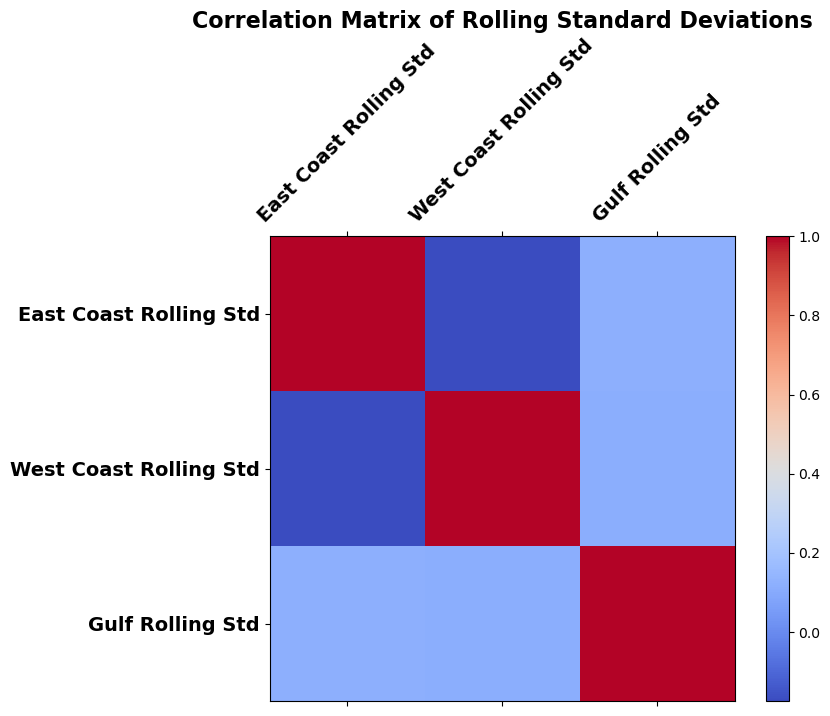

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Actual Weibull parameters extracted from the Excel file
# East Coast parameters
scale_east_coast = 9.767475
shape_east_coast = 2.119781

# West Coast parameters
scale_west_coast = 9.494586
shape_west_coast = 2.127585

# Gulf parameters
scale_gulf = 8.379240
shape_gulf = 2.097745

# Generate the wind speed samples using the actual parameters
np.random.seed(42)
east_coast_windspeed_sample = np.random.weibull(shape_east_coast, 1000) * scale_east_coast
west_coast_windspeed_sample = np.random.weibull(shape_west_coast, 1000) * scale_west_coast
gulf_windspeed_sample = np.random.weibull(shape_gulf, 1000) * scale_gulf

# Convert the data to pandas DataFrame for easier manipulation
east_coast_df = pd.DataFrame(east_coast_windspeed_sample, columns=["Wind Speed"])
west_coast_df = pd.DataFrame(west_coast_windspeed_sample, columns=["Wind Speed"])
gulf_df = pd.DataFrame(gulf_windspeed_sample, columns=["Wind Speed"])

# Calculate the rolling standard deviation with a window size of 50
window_size = 50
east_coast_df['Rolling Std'] = east_coast_df['Wind Speed'].rolling(window=window_size).std()
west_coast_df['Rolling Std'] = west_coast_df['Wind Speed'].rolling(window=window_size).std()
gulf_df['Rolling Std'] = gulf_df['Wind Speed'].rolling(window=window_size).std()

# Calculate the correlations between the rolling standard deviations
correlation_matrix = pd.DataFrame({
    'East Coast Rolling Std': east_coast_df['Rolling Std'],
    'West Coast Rolling Std': west_coast_df['Rolling Std'],
    'Gulf Rolling Std': gulf_df['Rolling Std']
}).corr()

print(correlation_matrix)

# Plotting the correlation matrix as a heatmap with larger text
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()

# Setting larger font sizes for the ticks and title
plt.xticks(range(len(correlation_matrix.columns)), 
           correlation_matrix.columns, rotation=45, fontweight='bold', fontsize=14)
plt.yticks(range(len(correlation_matrix.columns)), 
           correlation_matrix.columns, fontweight='bold', fontsize=14)
plt.title('Correlation Matrix of Rolling Standard Deviations', fontweight='bold', fontsize=16)

# Save the figure as a PNG file
plt.savefig('correlation_matrix.png')  
plt.show()


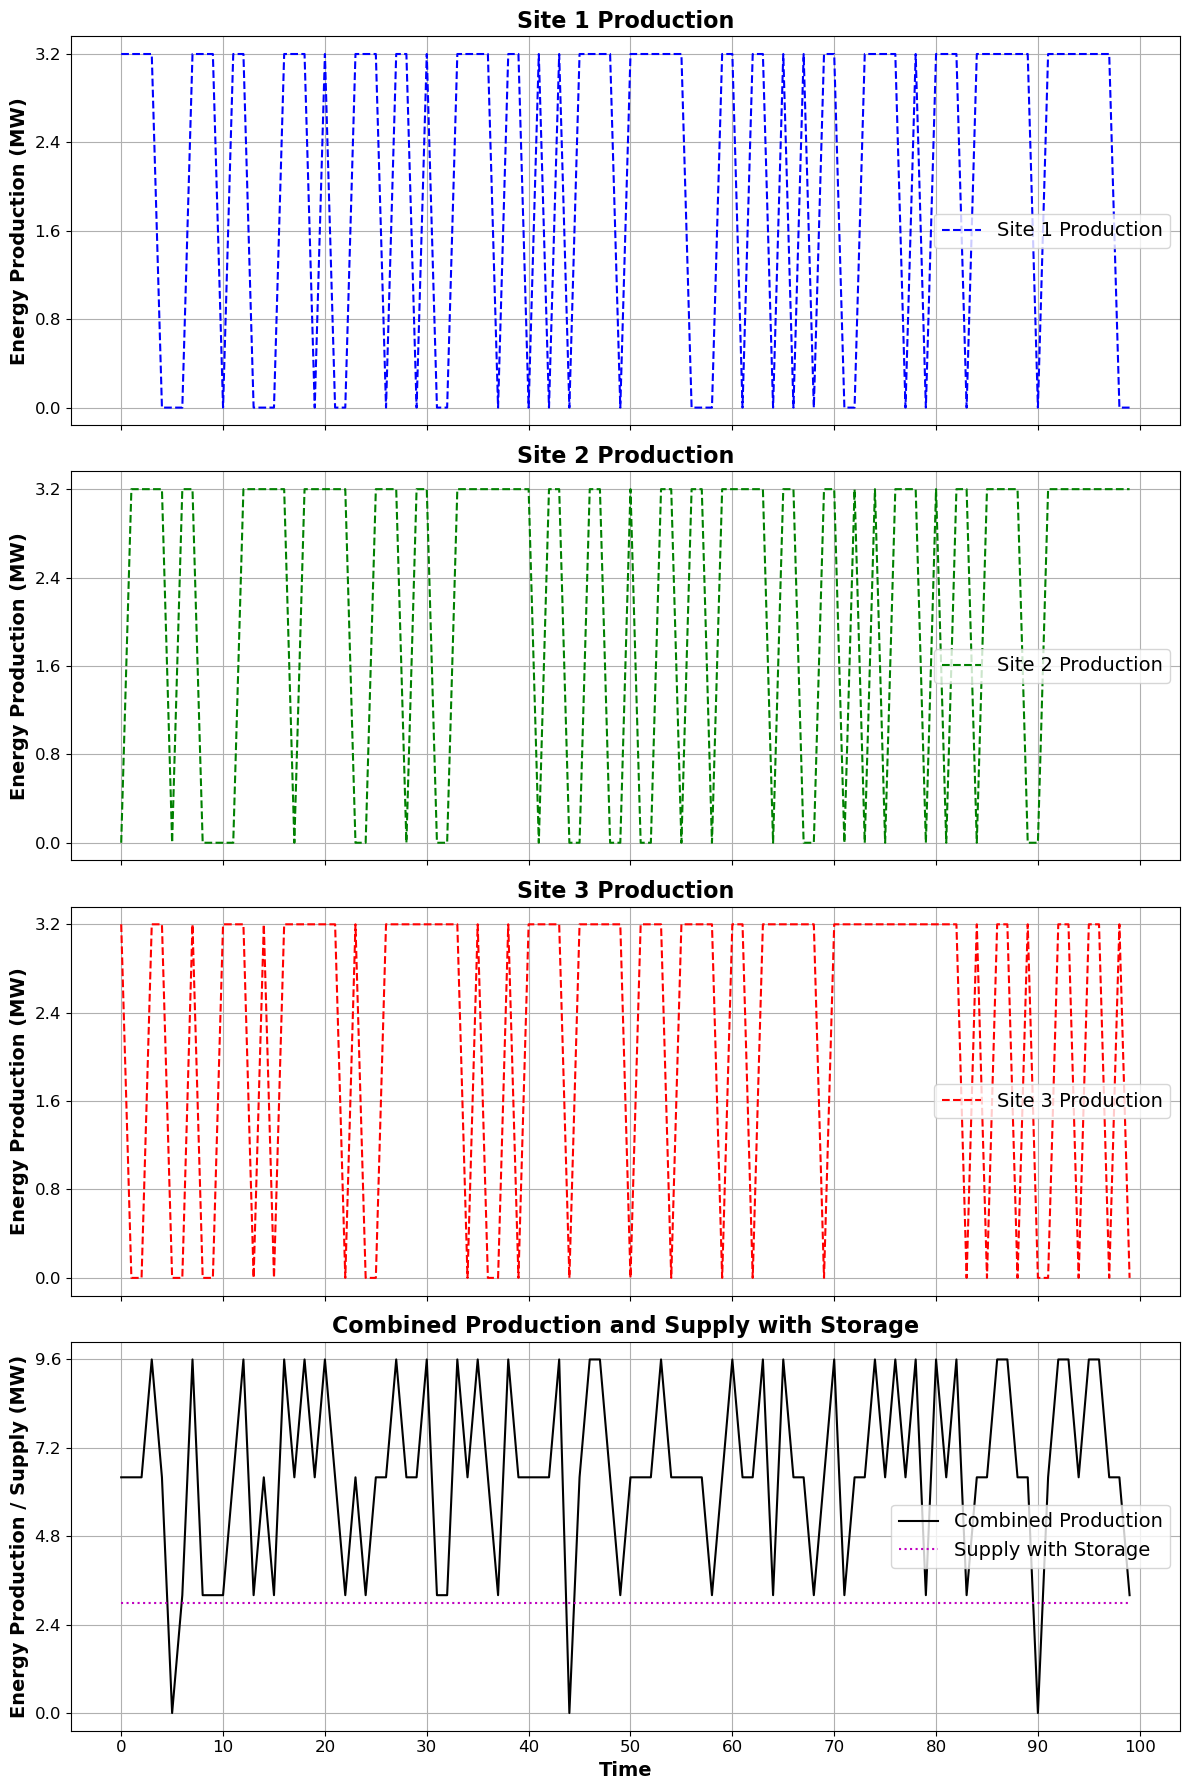

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
time_steps = 100
wind_speed_when_available = 8  # m/s
capacity_factor = 0.4  # capacity factor for energy production
storage_capacity = 25  # MW, adjusted storage capacity
demand = 3  # MW, adjusted hypothetical constant demand

# Generate synthetic wind availability data for 3 regions
np.random.seed(42)
wind_availability_site1 = np.random.choice([0, 1], size=time_steps, p=[0.3, 0.7])
wind_availability_site2 = np.random.choice([0, 1], size=time_steps, p=[0.3, 0.7])
wind_availability_site3 = np.random.choice([0, 1], size=time_steps, p=[0.3, 0.7])

# Generate wind speed data based on availability
wind_speed_site1 = wind_speed_when_available * wind_availability_site1
wind_speed_site2 = wind_speed_when_available * wind_availability_site2
wind_speed_site3 = wind_speed_when_available * wind_availability_site3

# Simulate energy production based on wind speed
def simulate_energy_production(wind_speed, capacity_factor=0.4):
    return wind_speed * capacity_factor

# Corrected energy storage model
def energy_storage_model(production, demand, storage_capacity, efficiency=0.9):
    storage = 0
    supply = []
    for p in production:
        if p + storage >= demand:
            supply.append(demand)
            storage = min(storage_capacity, storage + (p - demand) * efficiency)
        else:
            supply.append(p + storage)
            storage = max(0, storage + (p - demand) * efficiency)
    return np.array(supply)

# Calculate energy production for each site
energy_production_site1 = simulate_energy_production(wind_speed_site1, capacity_factor)
energy_production_site2 = simulate_energy_production(wind_speed_site2, capacity_factor)
energy_production_site3 = simulate_energy_production(wind_speed_site3, capacity_factor)

# Combine energy production
combined_production = (energy_production_site1 + energy_production_site2 + energy_production_site3)

# Calculate supply with storage for the unified system
supply_with_storage = energy_storage_model(combined_production, demand, storage_capacity)

# Plotting the results with larger text
fig, axs = plt.subplots(4, 1, figsize=(12, 18), sharex=True)

# Plot for Site 1
axs[0].plot(np.arange(time_steps), energy_production_site1, label='Site 1 Production', linestyle='--', color='b')
axs[0].set_ylabel('Energy Production (MW)', fontweight='bold', fontsize=14)
axs[0].set_title('Site 1 Production', fontweight='bold', fontsize=16)
axs[0].legend(fontsize=14)
axs[0].grid(True)
axs[0].set_xticks(np.arange(0, time_steps + 1, 10))
axs[0].set_yticks(np.linspace(0, max(energy_production_site1), 5))
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)

# Plot for Site 2
axs[1].plot(np.arange(time_steps), energy_production_site2, label='Site 2 Production', linestyle='--', color='g')
axs[1].set_ylabel('Energy Production (MW)', fontweight='bold', fontsize=14)
axs[1].set_title('Site 2 Production', fontweight='bold', fontsize=16)
axs[1].legend(fontsize=14)
axs[1].grid(True)
axs[1].set_xticks(np.arange(0, time_steps + 1, 10))
axs[1].set_yticks(np.linspace(0, max(energy_production_site2), 5))
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)

# Plot for Site 3
axs[2].plot(np.arange(time_steps), energy_production_site3, label='Site 3 Production', linestyle='--', color='r')
axs[2].set_ylabel('Energy Production (MW)', fontweight='bold', fontsize=14)
axs[2].set_title('Site 3 Production', fontweight='bold', fontsize=16)
axs[2].legend(fontsize=14)
axs[2].grid(True)
axs[2].set_xticks(np.arange(0, time_steps + 1, 10))
axs[2].set_yticks(np.linspace(0, max(energy_production_site3), 5))
axs[2].tick_params(axis='x', labelsize=12)
axs[2].tick_params(axis='y', labelsize=12)

# Plot for Combined Production and Supply with Storage
axs[3].plot(np.arange(time_steps), combined_production, label='Combined Production', linestyle='-', color='k')
axs[3].plot(np.arange(time_steps), supply_with_storage, label='Supply with Storage', linestyle=':', color='m')
axs[3].set_xlabel('Time', fontweight='bold', fontsize=14)
axs[3].set_ylabel('Energy Production / Supply (MW)', fontweight='bold', fontsize=14)
axs[3].set_title('Combined Production and Supply with Storage', fontweight='bold', fontsize=16)
axs[3].legend(fontsize=14)
axs[3].grid(True)
axs[3].set_xticks(np.arange(0, time_steps + 1, 10))
axs[3].set_yticks(np.linspace(0, max(combined_production), 5))
axs[3].tick_params(axis='x', labelsize=12)
axs[3].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.savefig('energy_production_plot.png')
plt.show()
